In [ ]:
from google.colab import auth
import gspread
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from oauth2client.client import GoogleCredentials
from google.auth import default
import pandas as pd


In [ ]:
data=pd.read_csv("/content/dataset - Sheet1.csv")
data

,INPUT,OUTPUT
0,1,13
1,2,23
2,3,33
3,4,43
4,5,53
5,6,63
6,7,73
7,8,83
8,9,93
9,10,103


In [ ]:
auth.authenticate_user()
creds,_=default()
gc=gspread.authorize(creds)

worksheet=gc.open('dataset').sheet1
data=worksheet.get_all_values()

dataset1 = pd.DataFrame(data[1:], columns=[col.strip() for col in data[0]])

dataset1 = dataset1.astype({'INPUT':'float'})
dataset1 = dataset1.astype({'OUTPUT':'float'})
dataset1.head()

,INPUT,OUTPUT
0,1.0,13.0
1,2.0,23.0
2,3.0,33.0
3,4.0,43.0
4,5.0,53.0


In [ ]:
X = dataset1.iloc[:, :-1].values
y = dataset1.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
Scaler=MinMaxScaler()
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train=Scaler.transform(X_train)

In [ ]:
ai_brain=Sequential([
    Dense(8,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1)
])

In [ ]:
ai_brain.compile(optimizer='rmsprop',loss='mse')
ai_brain.fit(X_train,y_train,epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step - loss: 13259.0400
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13255.5859
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 13253.1113
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 13251.0586
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 13249.2373
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 13247.5684
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 13246.0107
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 13244.5449
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13243.1494
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 13241.8027
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 13240.4980
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13239.2266
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 13237.9746
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 13236.7422
Epoch 15/2000


<Axes: >

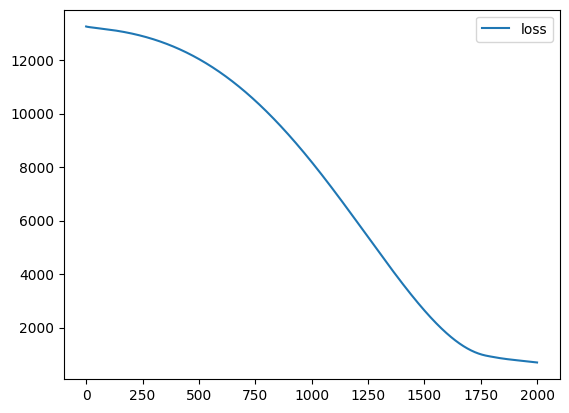

In [13]:
loss_df = pd.DataFrame(ai_brain.history.history)
loss_df.plot()

In [14]:
x_test1=Scaler.transform(X_test)

In [15]:
ai_brain.evaluate(x_test1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 1408.3737


1408.3736572265625

In [16]:
X_n1 = [[10]]

In [18]:
X_n1_1 = Scaler.transform(X_n1)
ai_brain.predict(X_n1_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[109.173515]], dtype=float32)